Load Model

In [24]:
import joblib
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
test_data = pd.read_csv('test_data.csv')

In [26]:
X_test = test_data.drop(columns=['AQI_Bucket'])
y_test = test_data['AQI_Bucket'].values

In [27]:
test_data.head()

,CO,Toluene,NO2,NOx,Benzene,Xylene,AQI,PM2.5,AQI_Bucket
0,1.81,88.23,29.74,71.75,92.86,9.10,90.0,66.74,3.0
1,1.68,32.30,93.50,234.88,6.33,9.85,325.0,146.75,5.0
2,0.28,0.06,31.26,58.16,0.00,0.00,75.0,5.60,3.0
3,2.23,3.75,15.57,25.20,2.44,2.61,318.0,158.43,5.0
4,1.43,9.10,54.53,31.27,1.97,1.30,128.0,65.50,1.0


In [28]:
knn_hyper = joblib.load('rf_hyper.pkl')

In [29]:
y_pred = knn_hyper.predict(X_test)

In [30]:
y_pred

array([3., 5., 3., ..., 3., 3., 1.])

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6610
         1.0       0.99      1.00      1.00     30679
         2.0       1.00      1.00      1.00      7808
         3.0       1.00      0.99      1.00     22321
         4.0       1.00      1.00      1.00      4375
         5.0       1.00      0.99      1.00      8833

    accuracy                           1.00     80626
   macro avg       1.00      1.00      1.00     80626
weighted avg       1.00      1.00      1.00     80626



<Axes: >

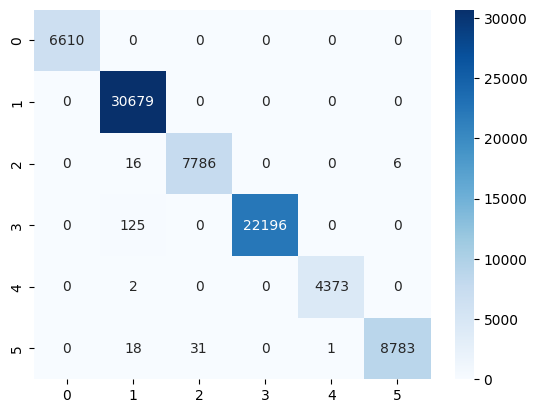

In [32]:
cf_metrics = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_metrics, annot=True, fmt='d', cmap='Blues')

Model memiliki performa terbaik karena dapat melakukan prediksi dengan data test yang berbeda dengan proses pembuatannya. Akurasi yang didapatkan yaitu 100%, namun ketika dilakukan pengecekan dengan confusion matrix terdapat beberapa data yang gagal memprediksi, namun secara garis besar model memiliki performa yang sangat baik.